
# Moving Average Time Series

---
> Erick Eduardo Aguilar Hernández:
> * mat.ErickAguilar@ciencias.unam.mx
> * isc.ErickAguilar@gmail.com
---

#  Moving Average Model

___


The moving average model is another time series process parametric family with some differences from the $AR(p)$ model., the moving average series of order q with drift c $MA(q)$ is defined as:

$$
\begin{align*}
X_{t} &= \varepsilon_t +\psi_1 \varepsilon_{t-1} +  \psi_2 \varepsilon_{t-2} + ... +  \psi_q \varepsilon_{t-q} + c \\
X_{t} &= (1 +\psi_1 B +  \psi_2 B + ... +  \psi_q B^q)\varepsilon_t + c \\
X_{t} &= \Psi_q(B)\varepsilon_t + c \\
\end{align*}
$$

Where: 
* $\psi_{i}$: It's a real coefficient.
* $\varepsilon_t$: It's and uncorrelated normal variable $N(0,\sigma^2)$ at "time" $t-i$ for $1 \leq i \leq k$

There is another useful representation for the $MA(q)$ process, replacing $\psi_i=-\theta_i$:

$$
\begin{align*}
X_{t} &= \varepsilon_t  -\theta_1 \varepsilon_{t-1} -\theta_2 \varepsilon_{t-2} - ... - \theta_q \varepsilon_{t-q}+ c \\
X_{t} &= (1-\theta_1B-\theta_2B^2- ... - \theta_q B^q)\varepsilon_t+c\\
X_{t} &= \Theta_q(B)\varepsilon_t+c\\
\end{align*}
$$


## MA(1) model
___


The MA(1) model it's the process given by the following recursion:

$$
X_t = \psi_1 \varepsilon_{t-1} + \varepsilon_t+c
$$


#### MA(1) model stationarity conditions
The $\{Xt\}$ process is always stationary.

**Mean**:
$$
\begin{align*}
    X_t &= \psi_1 \varepsilon_{t-1} + \varepsilon_t+c \\
    E[X_t] &= E[\psi_1 \varepsilon_{t-1} + \varepsilon_t+c] \\
    E[X_t] &= \psi_1 E[\varepsilon_{t-1}] + E[\varepsilon_t]+E[c] \\
    E[X_t] &= \psi_1[0]+[0]+E[c] \\
    E[X_t] &= c \\
\end{align*}
$$

**Variance**:
$$
\begin{align*}
    X_t &= \psi_1 \varepsilon_{t-1} + \varepsilon_t+c \\
    X_t -c &= \psi_1 \varepsilon_{t-1} + \varepsilon_t \\
    Z_t &= \psi_1 \varepsilon_{t-1} + \varepsilon_t \\
    Z_t^2 &= (\psi_1 \varepsilon_{t-1} + \varepsilon_t)(\psi_1 \varepsilon_{t-1} + \varepsilon_t ) \\
    Z_t^2 &=  \psi_1^2 \varepsilon_{t-1}^2+\psi_1 \varepsilon_{t-1}\varepsilon_t+\psi_1\varepsilon_t \\
    E[Z_t^2] &=  \psi_1^2 E[\varepsilon_{t-1}^2]+\psi_1 E[\varepsilon_{t-1}\varepsilon_t]+\psi_1E[\varepsilon_t \varepsilon_{t-1}] +E[\varepsilon_t^2]\\
    E[Z_t^2] &=  \psi_1^2\sigma^2 +\psi_1[0]+\psi_1[0] +\sigma^2\\
    V[X_t] &=  (1+\psi_1^2)\sigma^2\\
    V[X_t] &=  (1+\theta_1^2)\sigma^2\\
\end{align*}
$$

Note that the mean and variance always of the param values $\sigma^2, \psi_1$ and there is not restrictionto that params. That implies stationarity for every $\psi_1$

**Example:** MA(1) stationary process instance. 

In [1]:
run tsUtils.py

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('ggplot')

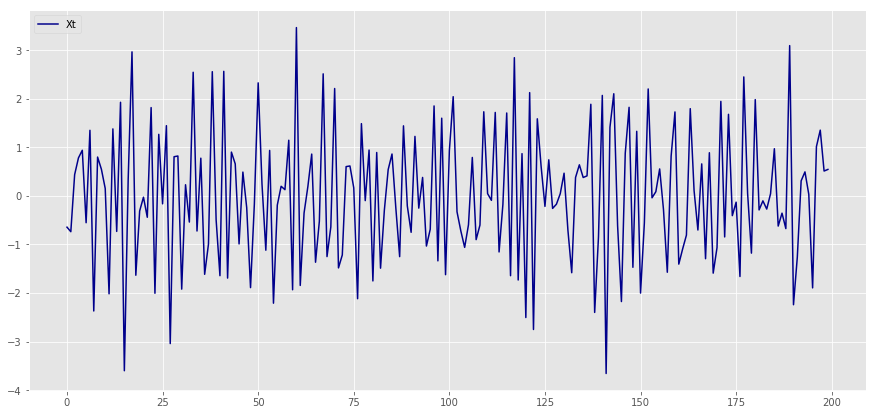

In [3]:
import statsmodels.api as sm
import numpy as np

ma = np.array([0.8])
n = 200
lags=50 
np.random.seed(5000)

Xt = sm.tsa.arma_generate_sample(np.r_[1, np.array([0, 0])],np.r_[1, -ma],n,1)
time_series_df = pd.DataFrame(Xt,columns=['Xt'])

plt.style.use('ggplot')
plotTimeSeries(time_series_df)

#### MA(1) Auto covariance and auto correlation functions.


Without loss of generality consider the centered moving average time series:

$$
X_t = \psi \varepsilon_{t-1} + \varepsilon_t
$$

**First autocovariance**:
$$
\begin{align*}
    X_t &= \psi_1 \varepsilon_{t-1} + \varepsilon_t\\
    X_tX_{t-1} &= (\psi_1 \varepsilon_{t-1} + \varepsilon_t)X_{t-1}\\
    X_tX_{t-1} &= \psi_1 \varepsilon_{t-1}X_{t-1} + \varepsilon_tX_{t-1}\\
    E[X_tX_{t-1}] &= \psi_1 E[\varepsilon_{t-1}X_{t-1}] + E[\varepsilon_tX_{t-1}]\\
    \gamma(1) &= \psi_1 E[\varepsilon_{t-1}X_{t-1}]+0\\
    &= \psi_1 E[\varepsilon_{t-1}(\varepsilon_{t-1}-\psi_1\varepsilon_{t-2})]\\
    &= \psi_1 E[\varepsilon_{t-1}\varepsilon_{t-1}-\psi_1\varepsilon_{t-1}\varepsilon_{t-2}]\\
    &= \psi_1 E[\varepsilon_{t-1}\varepsilon_{t-1}]-\psi_1 E[\varepsilon_{t-1}\varepsilon_{t-2}]\\
    &= \psi_1 E[\varepsilon_{t-1}\varepsilon_{t-1}]\\
    \gamma(1) &= \psi_1 \sigma^2\\
    \gamma(1) &= -\theta_1 \sigma^2\\
\end{align*}
$$

**K-th autocovariance**: for $k \geq 2$
$$
\begin{align*}
    X_t &= \psi_1 \varepsilon_{t-1} + \varepsilon_t\\
    X_tX_{t-k} &= (\psi_1 \varepsilon_{t-1} + \varepsilon_t)X_{t-k}\\
    X_tX_{t-k} &= \psi_1 \varepsilon_{t-1}X_{t-k} + \varepsilon_tX_{t-k}\\
    E[X_tX_{t-k}] &= \psi_1 E[\varepsilon_{t-1}X_{t-k}] + E[\varepsilon_tX_{t-k}]\\
    \gamma(k) &= \psi_1 E[\varepsilon_{t-1}X_{t-k}]+0\\
    &= \psi_1 E[\varepsilon_{t-1}(\varepsilon_{t-k}-\psi_1\varepsilon_{t-k-1})]\\
    &= \psi_1 E[\varepsilon_{t-1}\varepsilon_{t-k}-\psi_1\varepsilon_{t-1}\varepsilon_{t-k-1}]\\
    &= \psi_1 E[\varepsilon_{t-1}\varepsilon_{t-k}]-\psi_1 E[\varepsilon_{t-1}\varepsilon_{t-k-1}]\\
    &= \psi_1 (0)-0\\
    \gamma(k) &=0\\
\end{align*}
$$

**Auto covariance autocovariance**:

$$  
\gamma(k)=
\begin{cases}
\begin{align*}
(1+\theta_1^2)\sigma^2 \quad & k =0\\
-\theta_1 \sigma^2 \quad& k=1\\
0 \quad & k\geq2\\ 
\end{align*}
\end{cases}
$$

**Auto correlation autocovariance**:

$$  
\rho(k)=\frac{\gamma(k)}{\gamma(0)}=
\begin{cases}
\begin{align*}
1\quad & k =0\\
\frac{-\theta_1}{1+\theta_1^2} & k=1\\
0 \quad & k\geq2\\ 
\end{align*}
\end{cases}
$$

#### MA(1) Partial autocorrelation function.


$$
\begin{align*}
\phi_{11}&=\rho(1)\\
&=\frac{-\theta_1}{1+\theta_1^2}\\
&= \frac{-\theta_1}{1+\theta_1^2} \left(\frac{1-\theta_1^2}{1-\theta_1^2}\right) \\
&= \frac{-\theta_1^2(1-\theta_1^2)}{1-\theta_1^4}  \\
\phi_{22}&=
\frac{
    \begin{vmatrix}
        1 & \rho(1) \\
        \rho(1) & \rho(2)\\
    \end{vmatrix}
}{
    \begin{vmatrix}
        1 & \rho(1) \\
        \rho(1) & 1\\
    \end{vmatrix}
}\\
&= \frac{\rho(1)^2}{1-\rho(1)^2}\\
&= \frac{-\theta_1^2}{1+\theta_1^2+\theta_1^4} \\
&= \frac{-\theta_1^3(1-\theta_1^2)}{1-\theta_1^6}  \\
\phi_{33}&=
\frac{
    \begin{vmatrix}
        1 & \rho(1)  & \rho(1)\\
        \rho(1) & 1 & \rho(2)\\
        \rho(2) & \rho(1)  & \rho(3)\\
    \end{vmatrix}
}{
    \begin{vmatrix}
        1 & \rho(1)  & \rho(2)\\
        \rho(1) & 1 & \rho(1)\\
        \rho(2) & \rho(1)  & 1\\
    \end{vmatrix}
}\\
&= \frac{\rho(1)^3}{1-2\rho(1)^2}\\
&= \frac{-\theta_1^3}{1+\theta_1^2+\theta_1^4+\theta_1^6} \\
&= \frac{-\theta_1^3(1-\theta_1^2)}{1-\theta_1^8}  \\
\vdots\\
\phi_{kk}&=
\frac{
    \begin{vmatrix}
        1 & \rho(1)  & \rho(2) & \dots & \rho(k-2)  & \rho(1)\\
        \rho(1) & 1 & \rho(1) & \dots & \rho(k-3)  & \rho(2)\\
        \vdots & \vdots & \vdots &  & \vdots & \vdots \\
        \rho(k-1) & \rho(k-2)  & \rho(k-3)  & \vdots& \rho(1) & \rho(k) \\
    \end{vmatrix}
}{
    \begin{vmatrix}
        1 & \rho(1)  & \rho(2) & \dots & \rho(k-2)  & \rho(k-1)\\
        \rho(1) & 1 & \rho(1) & \dots & \rho(k-3)  & \rho(k-2)\\
        \vdots & \vdots & \vdots &  & \vdots & \vdots \\
        \rho(k-1) & \rho(k-2)  & \rho(k-3)  & \vdots& \rho(1) & 1 \\
    \end{vmatrix}
}\\
\phi_{kk}&= \frac{-\theta_1^k(1-\theta_1^2)}{1-\theta_1^{2(k+1)}}  \\
\end{align*}
$$

**Example:** Sample autocorrelations and partial autocorrelations using python for the MA(1) time series.

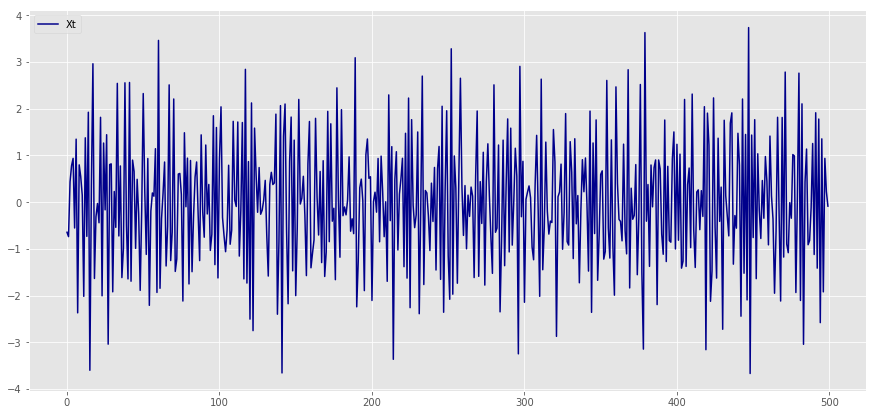

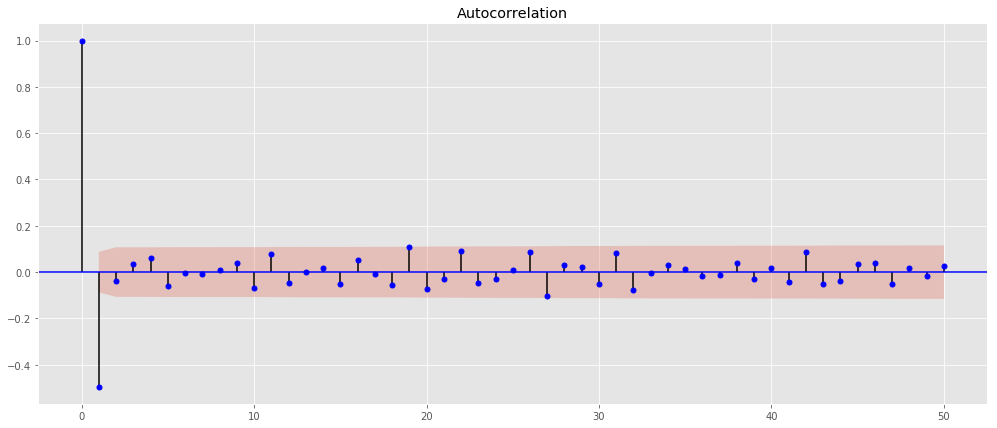

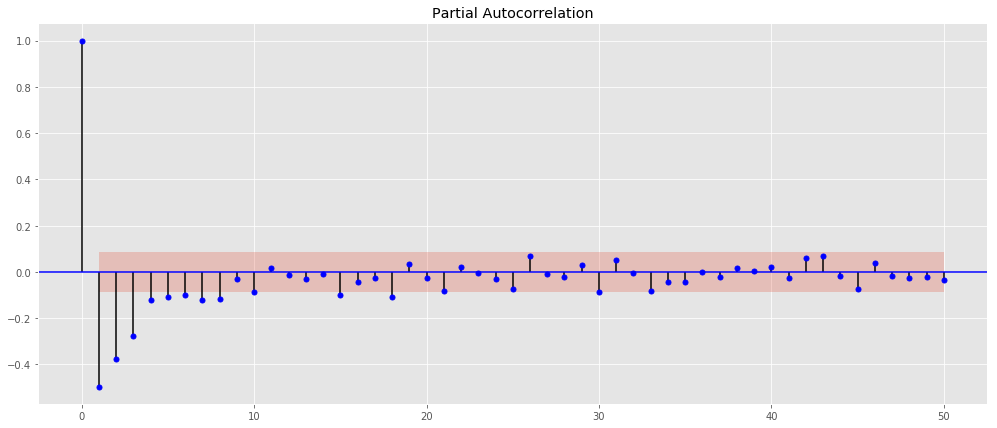

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

ma = np.array([0.8])
n = 500
lags=50
endog = 'Xt'

np.random.seed(5000)
Xt = sm.tsa.arma_generate_sample(np.r_[1, np.array([0, 0])],np.r_[1, -ma],n)
time_series_df = pd.DataFrame(Xt,columns=['Xt'])

plt.style.use('ggplot')
plotTimeSeries(time_series_df)
plt.figsize=(15,10)
fig = plot_acf(time_series_df[[endog]],lags=lags,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
fig = plot_pacf(time_series_df[[endog]],lags=lags,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
plt.show()